# <center>Assessment CLO-3: Tugas Pemrograman Learning</center>

<b>Topik</b>
Regresi pada Energy Efficiency menggunakan KNN

<b>Kelompok: </b>

Anggota:
1. Shalisyah Amania Fatiha - 1301223251
2. Muhammad Taufiq Al Fikri - 1301223417
3. Raditya Arta Paratama - 1301223197

#### Pendahuluan
Dataset yang kami gunakan merupakan data dari penilaian kebutuhan beban pemanasan dan beban pendinginan bangunan (yaitu efisiensi energi) sebagai fungsi dari parameter bangunan.

Untuk training dan testing kami akan pisahkan dulu data yang akan digunakan untuk train dan test menggunakan train_test_split dengan ukuran data test 20% dari keseluruhan data. Kami akan gunakan parameter MSE dan R-Squared pada testing untuk mengukur sejauh mana model ini bekerja.

In [60]:
!gdown '1mHq5-H-AwG4zW0UdwbudO1X_vI-auKzi'

Downloading...
From: https://drive.google.com/uc?id=1mHq5-H-AwG4zW0UdwbudO1X_vI-auKzi
To: /content/ENB2012_data.xlsx
100% 76.2k/76.2k [00:00<00:00, 95.6MB/s]


In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
file_path = 'ENB2012_data.xlsx'

df = pd.read_excel(file_path, sheet_name='Φύλλο1')

print(df)

       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


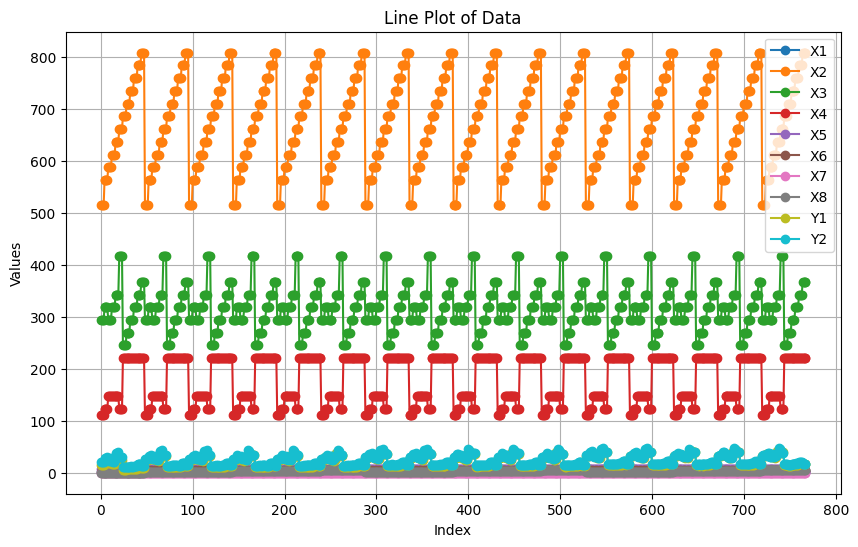

In [63]:
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.title('Line Plot of Data')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

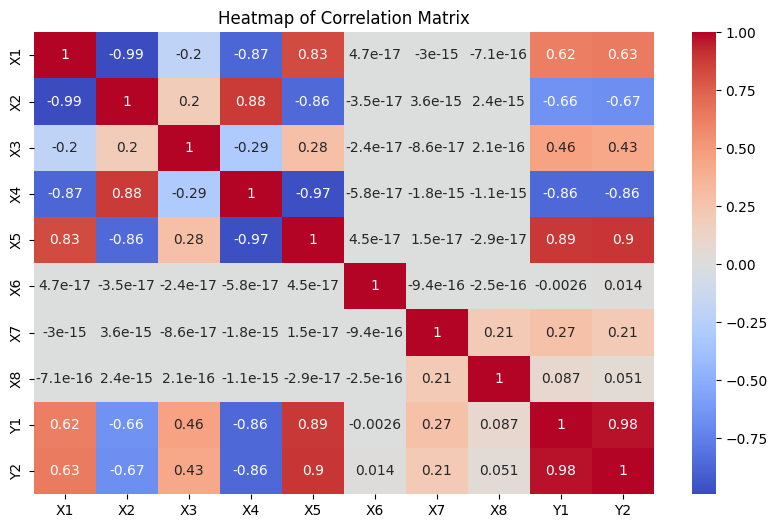

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

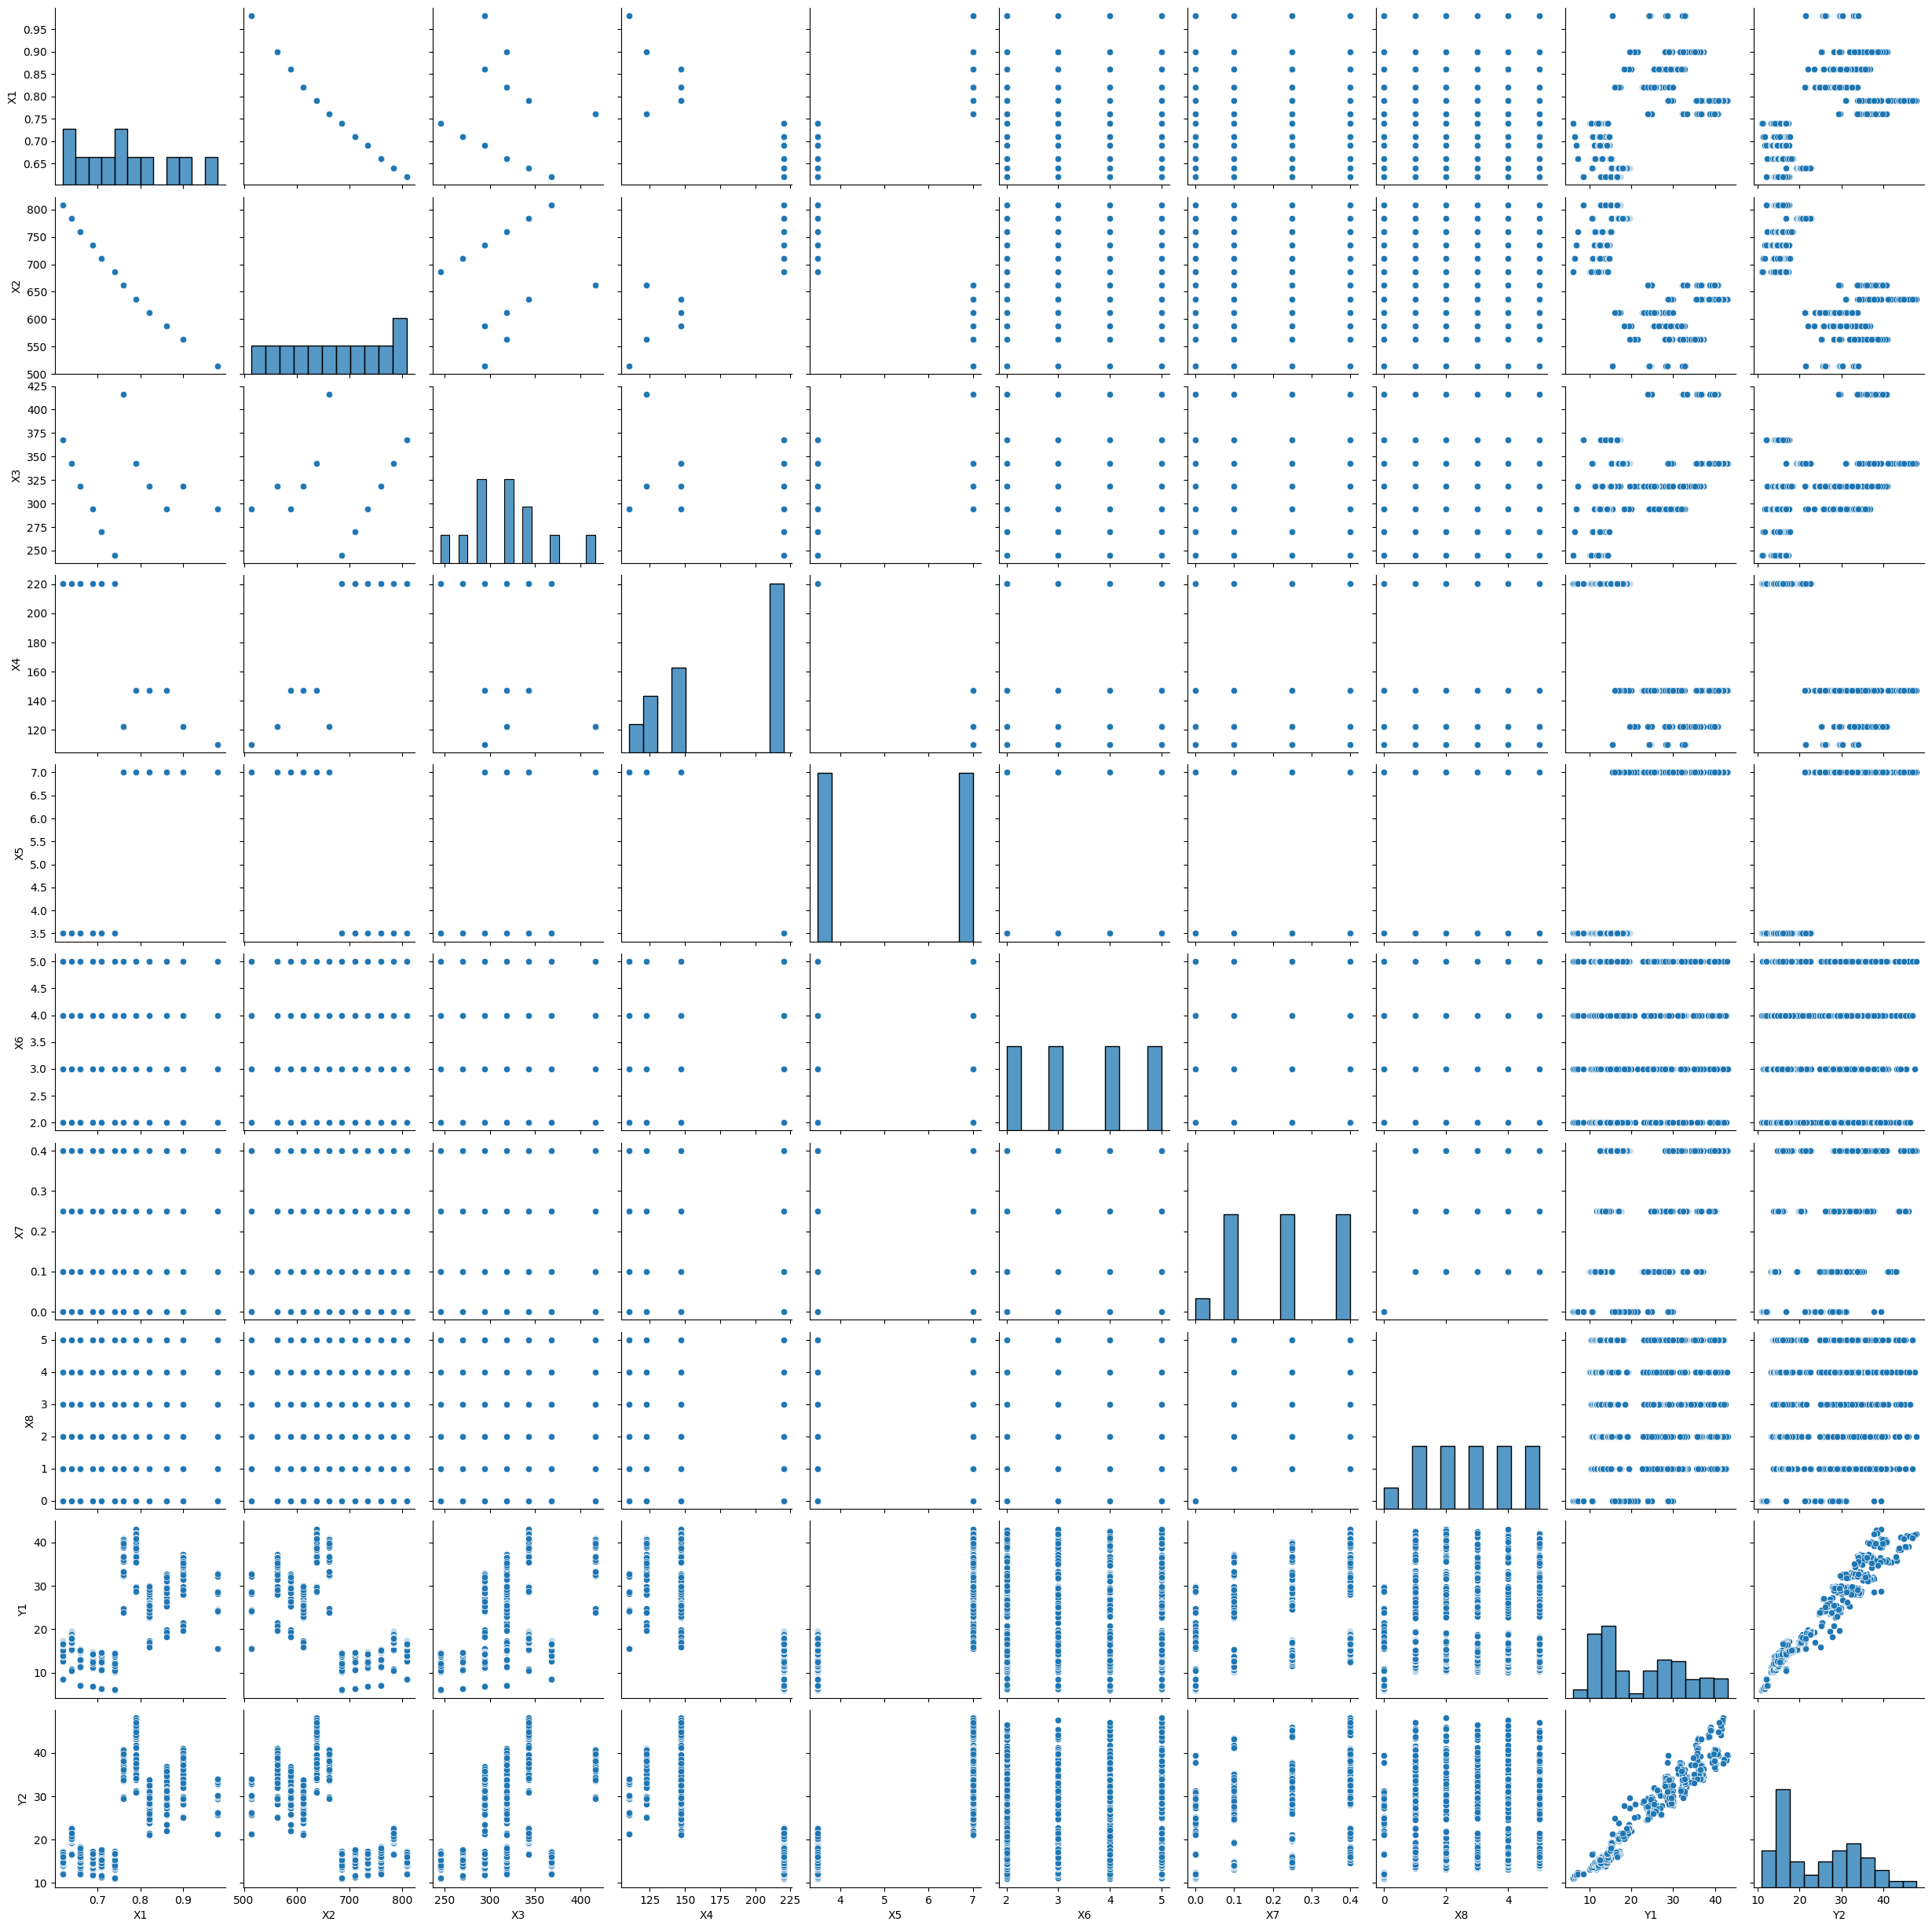

In [65]:
sns.pairplot(df)
plt.show()

In [66]:
print(df.isna().sum()) # Melihat jumlah data yang hilang

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [67]:
# Memisahkan fitur dan target
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
Y1 = df['Y1']
Y2 = df['Y2']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y1_train, y1_test = train_test_split(X, Y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, Y2, test_size=0.2, random_state=42)

#### Metode yang Digunakan
Dalam dataset dijelaskan bahwa output Y1 dan Y2 bertipe continuous maka dari itu kami perlu menyelesaikannya dengan regresi. Jika menggunakan klasifikasi, Y1 dan Y2 harus berbentuk kategori/label. Untuk metode yang kami gunakan adalah KNN dengan beberapa percobaan dalam penetuan nilai K. Nilai K yang akan dicoba adalah K = 3, K = 5, dan K = 7.

In [68]:
# Membuat model K-Nearest Neighbors Regressor
model_y1 = KNeighborsRegressor(n_neighbors=5)
model_y2 = KNeighborsRegressor(n_neighbors=5)


In [69]:
# Melatih model
model_y1.fit(X_train, y1_train)
model_y2.fit(X_train, y2_train)


KNeighborsRegressor()

In [70]:
# Memprediksi target
y1_pred = model_y1.predict(X_test)
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)

print(f"Mean Squared Error (Y1): {mse1}")
print(f"R-squared (Y1): {r2_1}")

y2_pred = model_y2.predict(X_test)
mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print(f"Mean Squared Error (Y2): {mse2}")
print(f"R-squared (Y2): {r2_2}")

# Membuat DataFrame hasil prediksi
results = X_test.copy()
results['Y1_Actual'] = y1_test
results['Y1_Predicted'] = y1_pred
results['Y2_Actual'] = y2_test
results['Y2_Predicted'] = y2_pred

# Menampilkan hasil prediksi
print(results)


Mean Squared Error (Y1): 4.85465490909091
R-squared (Y1): 0.9534247078951772
Mean Squared Error (Y2): 3.9801440779220765
R-squared (Y2): 0.9570444337330517
       X1     X2     X3      X4   X5  X6    X7  X8  Y1_Actual  Y1_Predicted  \
668  0.62  808.5  367.5  220.50  3.5   2  0.40   3      16.47        14.408   
324  0.66  759.5  318.5  220.50  3.5   2  0.25   1      13.17        13.650   
624  0.98  514.5  294.0  110.25  7.0   2  0.40   3      32.82        30.262   
690  0.79  637.0  343.0  147.00  7.0   4  0.40   4      41.32        40.496   
473  0.64  784.0  343.0  220.50  3.5   3  0.25   4      16.69        16.946   
..    ...    ...    ...     ...  ...  ..   ...  ..        ...           ...   
355  0.79  637.0  343.0  147.00  7.0   5  0.25   2      38.98        39.358   
534  0.90  563.5  318.5  122.50  7.0   4  0.40   1      36.66        34.370   
344  0.86  588.0  294.0  147.00  7.0   2  0.25   2      29.34        29.702   
296  0.86  588.0  294.0  147.00  7.0   2  0.25   1    

#### Hasil dan Analisis

Berikut hasil MSE dan R-Squared dari beberapa nilai K yang di coba (3, 5, 7)
- K = 5\
Mean Squared Error (Y1): 4.85465490909091\
R-squared (Y1): 0.9534247078951772\
Mean Squared Error (Y2): 3.9801440779220765\
R-squared (Y2): 0.9570444337330517

- K = 3\
Mean Squared Error (Y1): 5.406090825396826\
R-squared (Y1): 0.9481342620529931\
Mean Squared Error (Y2): 4.418353463203464\
R-squared (Y2): 0.9523150742124585

- K = 7\
Mean Squared Error (Y1): 6.521250268221576\
R-squared (Y1): 0.9374354837122809\
Mean Squared Error (Y2): 5.246404545454546\
R-squared (Y2): 0.9433783617619323

\
Nilai MSE yang lebih kecil menunjukkan bahwa model memiliki kesalahan prediksi yang lebih kecil.

R-Squared mengukur seberapa baik model dapat menjelaskan variabilitas data target. Nilai R-Squared berkisar antara 0 dan 1, dengan nilai yang lebih tinggi menunjukkan bahwa model lebih baik dalam menjelaskan variabilitas data.

#### Kesimpulan

- Performansi Model: Nilai R-Squared yang tinggi menunjukkan bahwa model K-Nearest Neighbors sangat efektif dalam menjelaskan variasi data dan memberikan prediksi yang cukup akurat untuk Heating Load dan Cooling Load.
- Kesalahan Prediksi: Meskipun terdapat beberapa kesalahan prediksi yang ditunjukkan oleh MSE, kesalahan ini cukup kecil, sehingga secara keseluruhan prediksi model cukup akurat.